# P3: Association Rule (AR) mining for redundant feature identification applied to complex disease study (20pt)

The problem: We are going to use the AR method to find possible gene regulation in Alzheimer’s disease using the AD data you already have (from HW1). The purpose here is to show you how a difficult biology problem can be approached with a datamining technique. 
In part 1, you performed feature selection on the AD data using random forest and SVM. Section of features is just one way to get rid of features that are not important to the problem at hand.  Another way is to explicitly identify and remove redundant features. Now, using the results of ARs that you learned from the data, develop a method 


# 0. Data preprocessing

In [70]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
import matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline
# Load the positive data
case = pd.read_csv('AD/case.gex',sep="\t", index_col=0)
case = case.T
#We are going to look at only the first 1800 genes
case = case.iloc[:,1:]
# Data Profile
print " Case.gex has {} data points with {} variables each.".format(*case.shape)

 Case.gex has 176 data points with 8560 variables each.


In [72]:
# Load the negative data 
# ctrl = pd.read_csv('AD/ctrl.gex',sep=" ")
ctrl = pd.read_table('AD/ctrl.gex', delim_whitespace=True,index_col= 0)
ctrl = ctrl.T
#We are going to look at only the first 1800 genes
ctrl = ctrl.iloc[:,1:]
print "Ctrl.gex has {} data points with {} variables each.".format(*ctrl.shape)

Ctrl.gex has 188 data points with 8560 variables each.


In [73]:
# fill NA with 0
case = case.fillna(0)
case = case.astype(float)
ctrl = ctrl.fillna(0).replace('NA.54E-18', 0)
ctrl = ctrl.astype(float)

In [74]:
# the function turn the gene expression matrix of the given data into a new 1/0 matrix, 
#where (i, j) = 1 if the i-th person has the expression of the j-th gene (item) among the 
#top 10% highest expression levels, or 0 otherwise. 
def convert(array):
    # top 10% index
    n = (int)(len(array) * 0.1) - 1
    nth_num = array[np.argsort(array)[::-1]][n]
    new_array = [(int)(num >= nth_num) for num in array]     
    return np.array(new_array)

In [75]:
new_ctrl = pd.DataFrame()
for x in ctrl.columns:
    new_ctrl[x] = convert(ctrl[x])
new_ctrl.head()

,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9257221-S,GI_9257224-S,GI_9257226-S,GI_9257237-S,GI_9257239-A,GI_9257241-S,GI_9257243-S,GI_9257244-A,GI_9257245-I,GI_9257247-S
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
new_ctrl.to_csv("newctrl.csv")
print " new_ctrl data has {} data points with {} variables each.".format(*new_ctrl.shape)

 new_ctrl data has 188 data points with 8560 variables each.


In [77]:
confirm = pd.read_csv('ctrl_10percent_confirm.csv')

In [78]:
confirm.head()

,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,Unnamed: 10,Total
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,914
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,470
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,205
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,230
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,648


In [79]:
# 10% data provided by professor
total = confirm["Total"][:-2]
total[:10]

0     914
1     470
2     205
3     230
4     648
5     274
6     791
7    1353
8     692
9     889
Name: Total, dtype: int64

In [80]:
# my preprocessed data
mytotal = new_ctrl.sum(axis=1)
mytotal[:10]

0     914
1     470
2     205
3     230
4     648
5     274
6     791
7    1353
8     692
9     889
dtype: int64

In [81]:
len(mytotal), len(total)

(188, 188)

In [82]:
for i in range(len(total)):
    if total[i] != mytotal[i]:
        # if my result is different from the provided file, print the index of the sample
        print i, total[i], mytotal[i]

**The above function checks that my data preprocessing result is exactly the same as the confirmation file provided.**

In [83]:
sum(new_ctrl.sum(axis=1))

154080

In [84]:
new_case = pd.DataFrame()
for x in case.columns:
    new_case[x] = convert(case[x])
new_case.head()

,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9257221-S,GI_9257224-S,GI_9257226-S,GI_9257237-S,GI_9257239-A,GI_9257241-S,GI_9257243-S,GI_9257244-A,GI_9257245-I,GI_9257247-S
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0


In [85]:
new_case.to_csv("newcase.csv")
print " new_case data has {} data points with {} variables each.".format(*new_case.shape)

 new_case data has 176 data points with 8560 variables each.


**Discuss**

The count of ones for all controls are exactly the same as those given by the professor. Therefore, I assume my data preprocessing is correctly. Since we only need to work on the first 1800 genes. I am going to thrink case and ctrl table to include only the first 1800 genes or 1000 genes

In [86]:
# return a list of all feature names for those features are 1 for each sample
def getOnesNames(row):
    features = []
    for i in range(len(row)):
        if row[i] == 1:
            features.append(row.index[i])
    return features

In [87]:
# The function extract the expressed features for each sample
# df: 0/1 matrix of original data containing 8560 features
# n: number of features we are going to look at. In this case: 1800
# return a list of samples' expressed feature names
def generateFeatures(df, n):
    sub_df = df.iloc[:,0:n]
    print "data has {} data points with {} variables each.".format(*sub_df.shape)
    samples_features = []
    for index, row in sub_df.iterrows():
        samples_features.append(getOnesNames(row))
    return samples_features

In [88]:
# generate file for Apriori
def generateFileForApriori(df,n, filename):
    samples = generateFeatures(df, n)
    with open(filename,'wb') as file:
        for sample in samples:
            file.write(','.join(sample))
            file.write('\n')

In [89]:
# prepare case file for Apriori algorithm with first 1800 features
generateFileForApriori(new_case, 1800, "case1800.csv")

data has 176 data points with 1800 variables each.


In [90]:
# prepare control file for Apriori algorithm with first 1800 features
generateFileForApriori(new_ctrl, 1800, "ctrl1800.csv")

data has 188 data points with 1800 variables each.


In [91]:
# prepare case file for Apriori algorithm with first 1000 features
generateFileForApriori(new_case, 1000, "case1000.csv")

data has 176 data points with 1000 variables each.


In [92]:
# prepare control file for Apriori algorithm with first 1000 features
generateFileForApriori(new_ctrl, 1000, "ctrl1000.csv")

data has 188 data points with 1000 variables each.


# 1. Generate all frequent item sets and interesting ARs 

In [93]:
# Apriori algorithm 
# copyright from https://github.com/asaini/Apriori

# I edited Asaini's code into two versions. One for running in these notebook, 
# the other for processing the data in terminal via command lines
# The main algorithms are the same, just the output is 

# The following version of apriori code was to generate the data in the notebook
import sys
from itertools import chain, combinations
from collections import defaultdict
from optparse import OptionParser


def subsets(arr):
    """ Returns non empty subsets of arr"""
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
        """calculates the support for items in the itemSet and returns a subset
       of the itemSet each of whose elements satisfies the minimum support"""
        _itemSet = set()
        localSet = defaultdict(int)

        for item in itemSet:
                for transaction in transactionList:
                        if item.issubset(transaction):
                                freqSet[item] += 1
                                localSet[item] += 1

        for item, count in localSet.items():
                support = float(count)/len(transactionList)

                if support >= minSupport:
                        _itemSet.add(item)

        return _itemSet


def joinSet(itemSet, length):
        """Join a set with itself and returns the n-element itemsets"""
        return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            itemSet.add(frozenset([item]))              # Generate 1-itemSets
    return itemSet, transactionList


def runApriori(data_iter, minSupport, minConfidence):
    """
    run the apriori algorithm. data_iter is a record iterator
    Return both:
     - items (tuple, support)
     - rules ((pretuple, posttuple), confidence)
    """
    itemSet, transactionList = getItemSetTransactionList(data_iter)

    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules

    oneCSet = returnItemsWithMinSupport(itemSet,
                                        transactionList,
                                        minSupport,
                                        freqSet)

    currentLSet = oneCSet
    k = 2
    while(currentLSet != set([])):
        largeSet[k-1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(currentLSet,
                                                transactionList,
                                                minSupport,
                                                freqSet)
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
            """local function which Returns the support of an item"""
            return float(freqSet[item])/len(transactionList)

    toRetItems = []
    for key, value in largeSet.items():
        toRetItems.extend([(tuple(item), getSupport(item))
                           for item in value])

    toRetRules = []
    for key, value in largeSet.items()[1:]:
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item)/getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)),
                                           confidence))
    return toRetItems, toRetRules


def dataFromFile(fname):
        """Function which reads from the file and yields a generator"""
        file_iter = open(fname, 'rU')
        for line in file_iter:
                line = line.strip().rstrip(',')                         # Remove trailing comma
                record = frozenset(line.split(','))
                yield record

def generateResult(fname, minSupport,minConfidence):
    inFile = dataFromFile(fname)
    items, rules = runApriori(inFile, minSupport, minConfidence)
    items_support = sorted(items, key=lambda (item, support): support, reverse = True)
    rules_confidence = sorted(rules, key=lambda (rule, confidence): confidence, reverse = True)
    return items_support, rules_confidence

## Problem 1
Given the two basket datasets created above, find all frequent item sets and interesting ARs with the minimal support from 2% to 8% (with an increment of 2%) and the minimal confidence from 50% to 90% (with an increment of 10%). Draw 3D plots, for AD and controls separately, showing the total number of frequent itemsets and ARs discovered (in separate figures) as a function of the min support and min confidence. (note you should have 4 plots)
Tip: make sure you turn the 1/0 matrices into the right basket data format for the software you use. 


## Answer:

## Implementation
These part of work was run on google cloud instance using the second version of Apriori algorithm provided above. Apriori uses a "bottom up" approach, where frequent subsets are extended one item at a time (a step known as candidate generation), and groups of candidates are tested against the data. The algorithm terminates when no further successful extensions are found. Apriori uses breadth-first search and a Hash tree structure to count candidate item sets efficiently. It generates candidate item sets of length  k from item sets of length  k-1. Then it prunes the candidates which have an infrequent sub pattern. According to the downward closure lemma, the candidate set contains all frequent k-length item sets. After that, it scans the transaction database to determine frequent item sets among the candidates.


The console print out the [outputfilename, number of frequent item sets, number of ARs]. The python code was used to process the data when min_support equals 0.08 or 0.06 considering the processing time was okay.

#### I used spark to process the data when min_support equals 0.04 or 0.02 since python takes forever to run... I used google cloud cluster and spark FP growth API (https://spark.apache.org/docs/2.2.0/mllib-frequent-pattern-mining.html).  Please see the below code blocks for details. 

The FP-growth algorithm is described in the paper Han et al., Mining frequent patterns without candidate generation, where “FP” stands for frequent pattern. Given a dataset of transactions, the first step of FP-growth is to calculate item frequencies and identify frequent items. Different from Apriori-like algorithms designed for the same purpose, the second step of FP-growth uses a suffix tree (FP-tree) structure to encode transactions without generating candidate sets explicitly, which are usually expensive to generate. After the second step, the frequent itemsets can be extracted from the FP-tree. 

**Note:** The input and output for both algorithms should be the same! However, there is a stackoverflow problem. I was only able to get number of frequents sets for case data with min_support of 0.04.

#### command lines for running one condition in pyspark


``` scala
from pyspark.sql.functions import split
from pyspark.ml.fpm import FPGrowth
data = (spark.read.text("case1800.txt").select(split("value", "\s+").alias("items")))
fp = FPGrowth(minSupport=0.08, minConfidence=0.9)
fpm = fp.fit(data)
freqs = fpm.freqItemsets.collect()
rules = fpm.associationRules.collect()
print len(freqs),len(rules)
``` 

#### command lines for running one condition using python

```python
python apriori.py -f case1000.csv -s minSupport  -c minConfidence -o case1000
```

## Result

### Each line of output is the [filename, number of frequent item sets, number of ARs]

### Part 1 : With 1000 genes:

### 1.1 ctrl
### ctrl data with 1000 genes, min_support = 0.1, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* ctrl1000_s_0.1_c_0.5.txt 0 0
* ctrl1000_s_0.1_c_0.6.txt 0 0
* ctrl1000_s_0.1_c_0.7.txt 0 0
* ctrl1000_s_0.1_c_0.8.txt 0 0
* ctrl1000_s_0.1_c_0.9.txt 0 0

### ctrl data with 1000 genes, min_support = 0.09, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* ctrl1000_s_0.09_c_0.5.txt 1001 2
* ctrl1000_s_0.09_c_0.6.txt 1001 2
* ctrl1000_s_0.09_c_0.7.txt 1001 2
* ctrl1000_s_0.09_c_0.8.txt 1001 2
* ctrl1000_s_0.09_c_0.9.txt 1001 2

### ctrl data with 1000 genes, min_support = 0.08, min_confidence = [0.5, 0.6, 0.7, 0.8, 0.9]

* ctrl1000_s_0.08_c_0.5.txt 1004 8
* ctrl1000_s_0.08_c_0.6.txt 1004 8
* ctrl1000_s_0.08_c_0.7.txt 1004 8
* ctrl1000_s_0.08_c_0.8.txt 1004 8
* ctrl1000_s_0.08_c_0.9.txt 1004 2

### ctrl data with 1000 genes, min_support = 0.07, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* ctrl1000_s_0.07_c_0.5.txt 1118 272
* ctrl1000_s_0.07_c_0.6.txt 1118 272
* ctrl1000_s_0.07_c_0.7.txt 1118 272
* ctrl1000_s_0.07_c_0.8.txt 1118 73
* ctrl1000_s_0.07_c_0.9.txt 1118 24

### ctrl data with 1000 genes, min_support = 0.06, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* ctrl1000_s_0.06_c_0.5.txt 2686 7196
* ctrl1000_s_0.06_c_0.6.txt 2686 7196
* ctrl1000_s_0.06_c_0.7.txt 2686 4043
* ctrl1000_s_0.06_c_0.8.txt 2686 2796
* ctrl1000_s_0.06_c_0.9.txt 2686 2046

### ctrl data with 1000 genes, min_support = 0.04, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* NA


### ctrl data with 1000 genes, min_support = 0.02, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* NA



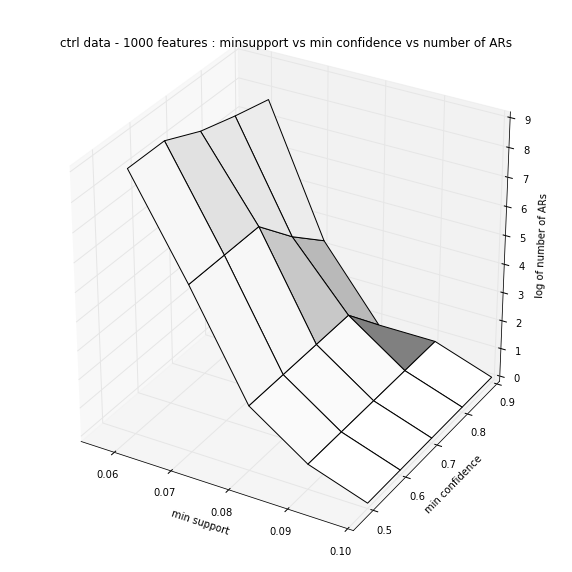

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
rcParams['figure.figsize'] = 10, 10
xlist = [0.06, 0.07, 0.08, 0.09, 0.1]
ylist =  [0.5, 0.6, 0.7, 0.8, 0.9]
#ylist =  [0.9, 0.8, 0.7, 0.6, 0.5]
Z = np.array([[7196, 272, 8, 2, 1],[7196, 272, 8, 2, 1],[4043, 272, 8, 2, 1],[2796, 73, 8, 2, 1],[2046,24, 2, 2, 1]])
#Z = np.array([[1,2,8,272,7196],[1,2,8,272,7196],[1,2,8,272,4043],[1,2,8,73,2796],[1,2,2,24,2046]])
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
X, Y = np.meshgrid(xlist, ylist)
ax.plot_surface(X, Y, np.log(Z), color = 'w', rstride = 1, cstride = 1)
ax.set_ylabel('min confidence')
ax.set_xlabel('min support')
ax.set_zlabel('log of number of ARs')
plt.title('ctrl data - 1000 features : minsupport vs min confidence vs number of ARs')
plt.show()

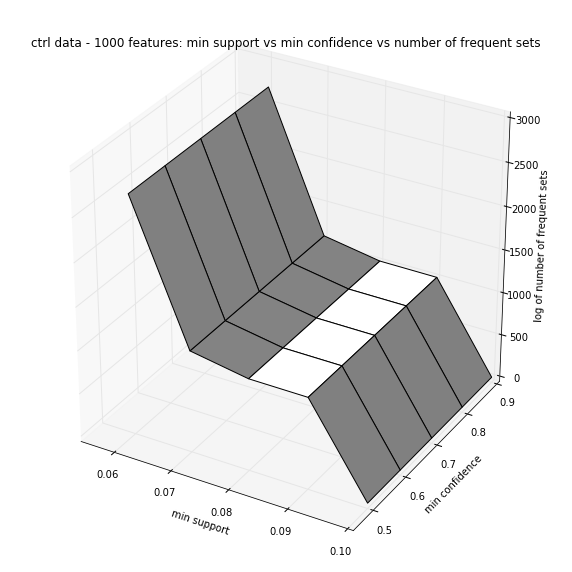

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
rcParams['figure.figsize'] = 10, 10
xlist = [0.06, 0.07, 0.08, 0.09, 0.1]
ylist =  [0.5, 0.6, 0.7, 0.8, 0.9]
Z = np.array([[2686,1118,1004,1001,0],[2686,1118,1004,1001,0],[2686,1118,1004,1001,0],[2686,1118,1004,1001,0],[2686,1118,1004,1001,0]])
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
X, Y = np.meshgrid(xlist, ylist)
ax.plot_surface(X, Y, Z, color = 'w', rstride = 1, cstride = 1)
ax.set_ylabel('min confidence')
ax.set_xlabel('min support')
ax.set_zlabel('log of number of frequent sets')
plt.title('ctrl data - 1000 features: min support vs min confidence vs number of frequent sets')
plt.show()

### 1.2. case

### case data with 1000 genes, min_support = 0.1, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* case1000_s_0.1_c_0.5.txt 0 0
* case1000_s_0.1_c_0.6.txt 0 0
* case1000_s_0.1_c_0.7.txt 0 0
* case1000_s_0.1_c_0.8.txt 0 0
* case1000_s_0.1_c_0.9.txt 0 0

### case data with 1000 genes, min_support = 0.09, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* case1000_s_0.09_c_0.5.txt 1000 0
* case1000_s_0.09_c_0.6.txt 1000 0
* case1000_s_0.09_c_0.6.txt 1000 0
* case1000_s_0.09_c_0.6.txt 1000 0
* case1000_s_0.09_c_0.6.txt 1000 0

### case data with 1000 genes, min_support = 0.08, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* case1000_s_0.08_c_0.5.txt 1006 12 
* case1000_s_0.08_c_0.6.txt 1006 12
* case1000_s_0.08_c_0.7.txt 1006 12
* case1000_s_0.08_c_0.8.txt 1006 12
* case1000_s_0.08_c_0.9.txt 1006 0

### case data with 1000 genes, min_support = 0.07, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* case1000_s_0.07_c_0.5.txt 1206 624
* case1000_s_0.07_c_0.7.txt 1206 624
* case1000_s_0.07_c_0.6.txt 1206 624
* case1000_s_0.07_c_0.8.txt 1206 272
* case1000_s_0.07_c_0.9.txt 1206 141


### case data with 1000 genes, min_support = 0.06, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* case1000_s_0.06_c_0.5.txt 3788 33096
* case1000_s_0.06_c_0.6.txt 3788 33096
* case1000_s_0.06_c_0.7.txt 3788 26047
* case1000_s_0.06_c_0.8.txt 3788 21471
* case1000_s_0.06_c_0.9.txt 3788 17211


### case data with 1000 genes, min_support = 0.04, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* case1000_s_0.04_c_0.5.txt 2625063 NA
* case1000_s_0.04_c_0.6.txt 2625063 NA
* case1000_s_0.04_c_0.7.txt 2625063 NA
* case1000_s_0.04_c_0.8.txt 2625063 NA
* case1000_s_0.04_c_0.9.txt 2625063 NA

### case data with 1000 genes, min_support = 0.02, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* NA

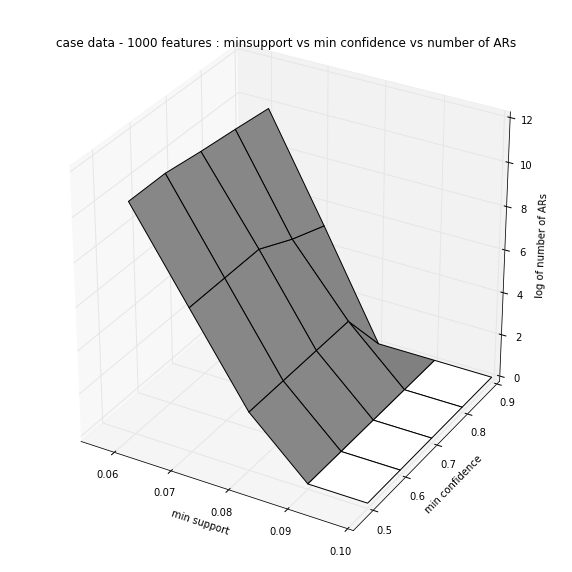

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
rcParams['figure.figsize'] = 10, 10
xlist = [0.06, 0.07, 0.08, 0.09, 0.1]
ylist =  [0.5, 0.6, 0.7, 0.8, 0.9]

# replace 0 with 1 so that the log value is 0
Z = np.array([[33096,624, 12, 1, 1],[33096, 624, 12, 1, 1],[26047, 624, 12, 1, 1],[21471, 272, 12, 1, 1],[17211,141, 1, 1, 1]])

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
X, Y = np.meshgrid(xlist, ylist)
ax.plot_surface(X, Y, np.log(Z), color = 'w', rstride = 1, cstride = 1)
ax.set_ylabel('min confidence')
ax.set_xlabel('min support')
ax.set_zlabel('log of number of ARs')
plt.title('case data - 1000 features : minsupport vs min confidence vs number of ARs')
plt.show()

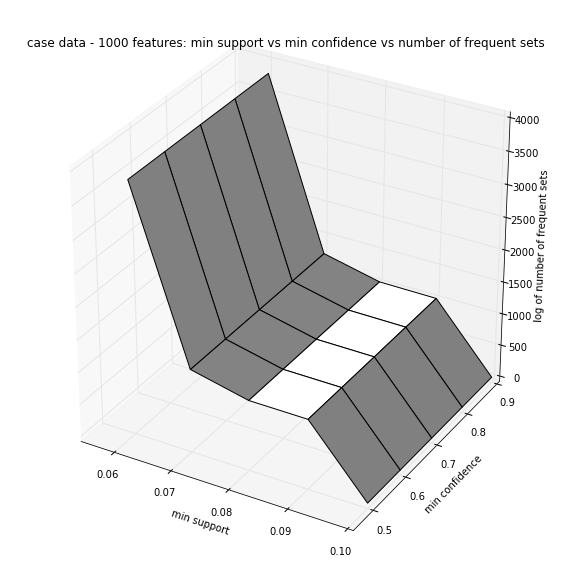

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
rcParams['figure.figsize'] = 10, 10
xlist = [0.06, 0.07, 0.08, 0.09, 0.1]
ylist =  [0.5, 0.6, 0.7, 0.8, 0.9]
Z = np.array([[3788,1206 ,1006,1000,0],[3788,1206 ,1006,1000,0],[3788,1206 ,1006,1000,0],[3788,1206 ,1006,1000,0],[3788,1206 ,1006,1000,0]])
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
X, Y = np.meshgrid(xlist, ylist)
ax.plot_surface(X, Y, Z, color = 'w', rstride = 1, cstride = 1)
ax.set_ylabel('min confidence')
ax.set_xlabel('min support')
ax.set_zlabel('log of number of frequent sets')
plt.title('case data - 1000 features: min support vs min confidence vs number of frequent sets')
plt.show()

### Part 2 : With 1800 genes:
### 2.1. ctrl
### ctrl data with 1800 genes, min_support = 0.08, min_confidence = [0.5, 0.6, 0.7, 0.8, 0.9]

* ctrl1800_s_0.08_c_0.5.txt 1813 26
* ctrl1800_s_0.08_c_0.6.txt 1813 26
* ctrl1800_s_0.08_c_0.7.txt 1813 26
* ctrl1800_s_0.08_c_0.8.txt 1813 26
* ctrl1800_s_0.08_c_0.9.txt 1813 4

### ctrl data with 1800 genes, min_support = 0.06, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* ctrl1800_s_0.06_c_0.5.txt 14678 274232
* ctrl1800_s_0.06_c_0.6.txt 14678 274232
* ctrl1800_s_0.06_c_0.7.txt 14678 233206
* ctrl1800_s_0.06_c_0.8.txt 14678 211497
* ctrl1800_s_0.06_c_0.9.txt 14678 186188

### ctrl data with 1800 genes, min_support = 0.04, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* NA


### ctrl data with 1800 genes, min_support = 0.02, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* NA

### 2.2. case
### case data with 1800 genes, min_support = 0.08, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* case1800_s_0.08_c_0.5.txt 1825 54
* case1800_s_0.08_c_0.6.txt 1825 54
* case1800_s_0.08_c_0.7.txt 1825 54
* case1800_s_0.08_c_0.8.txt 1825 54
* case1800_s_0.08_c_0.9.txt 1825 5


### case data with 1800 genes, min_support = 0.06, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* case1800_s_0.06_c_0.5.txt 32127 2186282
* case1800_s_0.06_c_0.6.txt 32127 2186282
* case1800_s_0.06_c_0.7.txt 32127 2045817
* case1800_s_0.06_c_0.8.txt 32127 1902667
* case1800_s_0.06_c_0.9.txt 32127 1702758


### case data with 1800 genes, min_support = 0.04, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* NA

### case data with 1800 genes, min_support = 0.02, min_confidence =  [0.5, 0.6, 0.7, 0.8, 0.9]
* NA

# Problem 2
Sort the frequent itemsets with supports greater than min support of 5%, from the highest frequency to the lowest, and report the top 50 most frequent itemsets. Also report all the ARs whose confidences are greater than the min confidence level of 80%.


## Answer

## Part 1 : With 1000 features

### 1.1 with 1000 features: top50 frequent sets for Case data

In [95]:
# run Apriori algorithm on case data
# return the frequent sets: case_items_support
# and ARs: case_fules_confidence
case_items_support, case_rules_confidence = generateResult("case1000.csv",0.06, 0.8)

In [159]:
# For frequent set
# We are not interested in frequent sets containing only one item, 
#therefore, we will exclude these from the set list
interest_case_items_support = [item for item in case_items_support if len(item[0]) != 1]
top_50_case = interest_case_items_support[0:50]

In [160]:
# display top 50 frequent sets for case data with their corresponding support value
top_50_case

[(('GI_10864030-S', 'GI_14916472-S'), 0.08522727272727272),
 (('GI_15011917-S', 'GI_14589955-S'), 0.08522727272727272),
 (('GI_10864030-S', 'GI_14249467-I'), 0.08522727272727272),
 (('GI_13376532-S', 'GI_12232430-S'), 0.08522727272727272),
 (('GI_13787194-S', 'GI_14165460-I'), 0.08522727272727272),
 (('GI_14589955-S', 'GI_16753216-A'), 0.08522727272727272),
 (('GI_12597630-S', 'GI_12232456-S'), 0.07954545454545454),
 (('GI_14249309-S', 'GI_10800147-S'), 0.07954545454545454),
 (('GI_15011917-S', 'GI_11321582-S'), 0.07954545454545454),
 (('GI_16905511-S', 'GI_16905512-S'), 0.07954545454545454),
 (('GI_16306562-S', 'GI_15011937-S'), 0.07954545454545454),
 (('GI_14249309-S', 'GI_14165460-I'), 0.07954545454545454),
 (('GI_14591913-S', 'GI_14591915-S'), 0.07954545454545454),
 (('GI_14249251-S', 'GI_14249309-S'), 0.07954545454545454),
 (('GI_13375741-S', 'GI_14150038-S'), 0.07954545454545454),
 (('GI_13376477-S', 'GI_11056009-S'), 0.07954545454545454),
 (('GI_13376672-S', 'GI_13376746-S'), 0.

### 1.2 with 1000 features: top50 frequent sets for Ctrl data

In [98]:
# I repeated the above steps for control data
# 1. run Apriori algorithm on control data, return frequent sets and ARs
ctrl_items_support, ctrl_rules_confidence = generateResult("ctrl1000.csv",0.06, 0.8)

In [99]:
# We are not interested in frequent sets containing only one item, 
# therefore, we will exclude these from the set list
interest_ctrl_items_support = [item for item in ctrl_items_support if len(item[0]) != 1]
top_50_ctrl = interest_ctrl_items_support[0:50]

In [100]:
# display top 50 frequent sets for control data with their corresponding support value
top_50_ctrl

[(('GI_13376477-S', 'GI_11056009-S'), 0.09042553191489362),
 (('GI_12232430-S', 'GI_12232456-S'), 0.0851063829787234),
 (('GI_12025664-S', 'GI_14589955-S'), 0.0851063829787234),
 (('GI_11641260-S', 'GI_13376659-S'), 0.0851063829787234),
 (('GI_12232456-S', 'GI_14042952-S'), 0.0797872340425532),
 (('GI_13540514-S', 'GI_13376847-S'), 0.0797872340425532),
 (('GI_14249309-S', 'GI_14165460-I'), 0.0797872340425532),
 (('GI_13128859-S', 'GI_11545766-S'), 0.0797872340425532),
 (('GI_16554603-S', 'GI_14589955-S'), 0.0797872340425532),
 (('GI_13376321-S', 'GI_13112047-A'), 0.0797872340425532),
 (('GI_13376746-S', 'GI_14249467-I'), 0.0797872340425532),
 (('GI_14589955-S', 'GI_16554576-S'), 0.0797872340425532),
 (('GI_11641260-S', 'GI_10864030-S'), 0.0797872340425532),
 (('GI_14249309-S', 'GI_13787194-S'), 0.0797872340425532),
 (('GI_14456711-S', 'GI_14043068-S'), 0.0797872340425532),
 (('GI_14165460-I', 'GI_10800147-S'), 0.0797872340425532),
 (('GI_13787194-S', 'GI_13376182-S'), 0.079787234042553

### 1.3 with 1000 features: ARs with min confidence > 0.8 for Case data

In [101]:
# get top 50 frequent sets for case and ctrl data repectively
top_50_case_frequent_set = [item[0] for item in top_50_case]
top_50_ctrl_frequent_set = [item[0] for item in top_50_ctrl]

In [102]:
# store top 50 frequent sets for case data(1000 features) into file top50case.csv
with open("top50case.csv",'wb') as file:
    for s in top_50_case_frequent_set:
        file.write(','.join(s))
        file.write('\n')

In [103]:
# store top 50 fequent sets for ctrl data(1000 features) into file top50ctrl.csv
with open("top50ctrl.csv",'wb') as file:
    for s in top_50_ctrl_frequent_set:
        file.write(','.join(s))
        file.write('\n')

In [104]:
# The function print ARs in good format
def printARs(ARs):
    for rule, confidence in ARs:     
        pre, post = rule     
        print "Rule: %s ==> %s , %.3f" % (str(pre), str(post), confidence)

In [161]:
# We run apriori algorithm on top50 frequent sets with min confidence as 0.8 for case data(1000 features)
# top50_case_ARs stores ARs from top50 frequent sets with min confidenece as 0.8 for case data(1000 features)
top50_case_freq_set, top50_case_ARs = generateResult("top50case.csv", 0, 0.8)

In [162]:
#print ARs and its corresponding confidence sore
printARs(top50_case_ARs)

Rule: ('GI_14591914-S',) ==> ('GI_16905511-S',) , 1.000
Rule: ('GI_14456711-S',) ==> ('GI_14043068-S',) , 1.000
Rule: ('GI_14043068-S',) ==> ('GI_14456711-S',) , 1.000
Rule: ('GI_14195633-S',) ==> ('GI_11545919-S',) , 1.000
Rule: ('GI_11545919-S',) ==> ('GI_14195633-S',) , 1.000
Rule: ('GI_13430873-S',) ==> ('GI_14165460-I',) , 1.000
Rule: ('GI_16117790-S',) ==> ('GI_16306562-S',) , 1.000
Rule: ('GI_14591913-S',) ==> ('GI_14591915-S',) , 1.000
Rule: ('GI_14591915-S',) ==> ('GI_14591913-S',) , 1.000
Rule: ('GI_13376528-S',) ==> ('GI_10864030-S',) , 1.000
Rule: ('GI_13375741-S',) ==> ('GI_14150038-S',) , 1.000
Rule: ('GI_14150038-S',) ==> ('GI_13375741-S',) , 1.000
Rule: ('GI_14141192-S',) ==> ('GI_16905511-S',) , 1.000
Rule: ('GI_12597630-S',) ==> ('GI_12232456-S',) , 1.000
Rule: ('GI_12545396-I',) ==> ('GI_14165460-I',) , 1.000
Rule: ('GI_15011937-S',) ==> ('GI_16306562-S',) , 1.000
Rule: ('GI_13904868-S',) ==> ('GI_16306560-S',) , 1.000
Rule: ('GI_16306560-S',) ==> ('GI_13904868-S',) 

In [163]:
print "There are ", len(top50_case_ARs), " ARs with min confidence > 0.8 among top50 frequent sets in case data."

There are  24  ARs with min confidence > 0.8 among top50 frequent sets in case data.


###  1.4 with 1000 features: ARs with min confidence > 0.8 for Ctrl data

In [164]:
# We run apriori algorithm on top50 frequent sets with min confidence as 0.8 for ctrl data(1000 features)
# top50_case_ARs stores ARs from top50 frequent sets with min confidenece as 0.8 for ctrl data(1000 features)
top50_ctrl_freq_set, top50_ctrl_ARs = generateResult("top50ctrl.csv", 0, 0.8)

In [165]:
# print ARs and its corresponding confidence score
printARs(top50_ctrl_ARs)

Rule: ('GI_14042952-S',) ==> ('GI_12232456-S',) , 1.000
Rule: ('GI_15890084-A',) ==> ('GI_11096339-S',) , 1.000
Rule: ('GI_11096339-S',) ==> ('GI_15890084-A',) , 1.000
Rule: ('GI_13376528-S',) ==> ('GI_13376746-S',) , 1.000
Rule: ('GI_13376207-S',) ==> ('GI_14042967-S',) , 1.000
Rule: ('GI_13128859-S',) ==> ('GI_11545766-S',) , 1.000
Rule: ('GI_14456711-S',) ==> ('GI_14043068-S',) , 1.000
Rule: ('GI_14043068-S',) ==> ('GI_14456711-S',) , 1.000
Rule: ('GI_10864008-I',) ==> ('GI_12965196-S',) , 1.000
Rule: ('GI_12965196-S',) ==> ('GI_10864008-I',) , 1.000
Rule: ('GI_11038670-S',) ==> ('GI_11545766-S',) , 1.000
Rule: ('GI_14249499-S',) ==> ('GI_12232430-S',) , 1.000
Rule: ('GI_16117792-S',) ==> ('GI_14141191-S',) , 1.000
Rule: ('GI_13540514-S',) ==> ('GI_13376847-S',) , 1.000
Rule: ('GI_13376847-S',) ==> ('GI_13540514-S',) , 1.000
Rule: ('GI_16905511-S',) ==> ('GI_15431289-S',) , 1.000
Rule: ('GI_15431289-S',) ==> ('GI_16905511-S',) , 1.000
Rule: ('GI_14141189-S',) ==> ('GI_13904868-S',) 

In [110]:
print "There are ", len(top50_ctrl_ARs), " ARs with min confidence > 0.8 among top50 frequent sets in control data."

There are  33  ARs with min confidence > 0.8 among top50 frequent sets in control data.


## Part 2 : With 1800 features

###  2.1 with 1800 features:  top50 frequent sets for Case data

In [111]:
# run Apriori algorithm on case data(1800 features)
# return the sorted frequent sets: case_items_support
# and sorted ARs: case_fules_confidence
case1800_items_support, case1800_rules_confidence = generateResult("case1800.csv",0.06, 0.8)

In [112]:
# For frequent set
# We are not interested in frequent sets containing only one item, 
#therefore, we will exclude these from the set list
interest_case1800_items_support = [item for item in case1800_items_support if len(item[0]) != 1]
top_50_case1800 = interest_case1800_items_support[0:50]

In [113]:
# display top 50 frequent sets for case data with their corresponding support value
top_50_case1800

[(('GI_17978503-A', 'GI_17978501-A'), 0.09090909090909091),
 (('GI_18105001-I', 'GI_13376746-S'), 0.08522727272727272),
 (('GI_13376532-S', 'GI_12232430-S'), 0.08522727272727272),
 (('GI_20336255-I', 'GI_13376528-S'), 0.08522727272727272),
 (('GI_20336255-I', 'GI_14916472-S'), 0.08522727272727272),
 (('GI_19923324-S', 'GI_12545396-I'), 0.08522727272727272),
 (('GI_20336255-I', 'GI_19924114-I'), 0.08522727272727272),
 (('GI_20336255-I', 'GI_14249467-I'), 0.08522727272727272),
 (('GI_18141306-S', 'GI_14249467-I'), 0.08522727272727272),
 (('GI_14589955-S', 'GI_16753216-A'), 0.08522727272727272),
 (('GI_14916472-S', 'GI_10864030-S'), 0.08522727272727272),
 (('GI_13787194-S', 'GI_14165460-I'), 0.08522727272727272),
 (('GI_13376477-S', 'GI_19743870-I'), 0.08522727272727272),
 (('GI_20357531-S', 'GI_19923159-S'), 0.08522727272727272),
 (('GI_15011917-S', 'GI_14589955-S'), 0.08522727272727272),
 (('GI_20070184-S', 'GI_14165460-I'), 0.08522727272727272),
 (('GI_20336255-I', 'GI_10864030-S'), 0.

### 2.2 with 1800 features:  top50 frequent sets for Ctrl data

In [114]:
# I repeated the above steps for control data
# run Apriori algorithm on control data, return frequent sets and ARs
ctrl1800_items_support, ctrl1800_rules_confidence = generateResult("ctrl1800.csv",0.06, 0.8)

In [115]:
# We are not interested in frequent sets containing only one item, 
# therefore, we will exclude these from the set list
interest_ctrl1800_items_support = [item for item in ctrl1800_items_support if len(item[0]) != 1]
top_50_ctrl1800 = interest_ctrl1800_items_support[0:50]

In [116]:
# display top 50 frequent sets for control data with their corresponding support value
top_50_ctrl1800

[(('GI_17978503-A', 'GI_17978501-A'), 0.09042553191489362),
 (('GI_13376477-S', 'GI_11056009-S'), 0.09042553191489362),
 (('GI_21237744-A', 'GI_21264573-S'), 0.0851063829787234),
 (('GI_19924114-I', 'GI_18765737-A'), 0.0851063829787234),
 (('GI_19923589-S', 'GI_10864030-S'), 0.0851063829787234),
 (('GI_12025664-S', 'GI_14589955-S'), 0.0851063829787234),
 (('GI_20336255-I', 'GI_13376746-S'), 0.0851063829787234),
 (('GI_19924114-I', 'GI_19923854-S'), 0.0851063829787234),
 (('GI_12232430-S', 'GI_12232456-S'), 0.0851063829787234),
 (('GI_13376528-S', 'GI_19923854-S'), 0.0851063829787234),
 (('GI_11641260-S', 'GI_13376659-S'), 0.0851063829787234),
 (('GI_14249309-S', 'GI_20070320-S'), 0.0851063829787234),
 (('GI_20070320-S', 'GI_14165460-I'), 0.0851063829787234),
 (('GI_13376030-A', 'GI_19923334-S'), 0.0797872340425532),
 (('GI_18141306-S', 'GI_14916472-S'), 0.0797872340425532),
 (('GI_16554603-S', 'GI_14589955-S'), 0.0797872340425532),
 (('GI_19743893-I', 'GI_14165460-I'), 0.07978723404255

### 2.3 with 1800 features:  ARs with min confidence > 0.8 for Case data

In [117]:
# get top 50 frequent sets for case and ctrl data （1800 features） repectively
top_50_case1800_frequent_set = [item[0] for item in top_50_case1800]
top_50_ctrl1800_frequent_set = [item[0] for item in top_50_ctrl1800]

In [118]:
# store top 50 fequent sets for case data(1800 features) into file top50case1800.csv
with open("top50case1800.csv",'wb') as file:
    for s in top_50_case1800_frequent_set:
        file.write(','.join(s))
        file.write('\n')

In [119]:
# store top 50 fequent sets for ctrl data(1800 features) into file top50ctrl1800.csv
with open("top50ctrl1800.csv",'wb') as file:
    for s in top_50_ctrl1800_frequent_set:
        file.write(','.join(s))
        file.write('\n')

In [120]:
# We run apriori algorithm on top50 frequent sets with min confidence as 0.8 for case data(1800 features)
# top50_case1800_ARs stores ARs from top50 frequent sets with min confidenece as 0.8 for case data(1800 features)
top50_case1800_freq_set, top50_case1800_ARs = generateResult("top50case1800.csv", 0, 0.8)

In [121]:
#print ARs and its corresponding confidence sore
printARs(top50_case1800_ARs)

Rule: ('GI_11321582-S',) ==> ('GI_14589955-S',) , 1.000
Rule: ('GI_16306562-S',) ==> ('GI_17105393-S',) , 1.000
Rule: ('GI_17158043-S',) ==> ('GI_17105395-S',) , 1.000
Rule: ('GI_14042952-S',) ==> ('GI_19923159-S',) , 1.000
Rule: ('GI_13376659-S',) ==> ('GI_18141306-S',) , 1.000
Rule: ('GI_20149601-S',) ==> ('GI_13376746-S',) , 1.000
Rule: ('GI_14456711-S',) ==> ('GI_14043068-S',) , 1.000
Rule: ('GI_14043068-S',) ==> ('GI_14456711-S',) , 1.000
Rule: ('GI_19111149-S',) ==> ('GI_19923829-S',) , 1.000
Rule: ('GI_19923829-S',) ==> ('GI_19111149-S',) , 1.000
Rule: ('GI_19923783-S',) ==> ('GI_14589955-S',) , 1.000
Rule: ('GI_13376553-S',) ==> ('GI_20070184-S',) , 1.000
Rule: ('GI_13376477-S',) ==> ('GI_19743870-I',) , 1.000
Rule: ('GI_15011917-S',) ==> ('GI_14589955-S',) , 1.000
Rule: ('GI_19923589-S',) ==> ('GI_13376746-S',) , 1.000
Rule: ('GI_13904868-S',) ==> ('GI_16306560-S',) , 1.000
Rule: ('GI_16306560-S',) ==> ('GI_13904868-S',) , 1.000
Rule: ('GI_16753216-A',) ==> ('GI_14589955-S',) 

### 2.4 with 1800 features:  ARs with min confidence > 0.8 for Ctrl data

In [122]:
# We run apriori algorithm on top50 frequent sets with min confidence as 0.8 for ctrl data(1800 features)
# top50_ctrl1800_ARs stores ARs from top50 frequent sets with min confidenece as 0.8 for ctrl data(1800 features)
top50_ctrl1800_freq_set, top50_ctrl1800_ARs = generateResult("top50ctrl1800.csv", 0, 0.8)

In [123]:
# print ARs and its corresponding confidence score
printARs(top50_ctrl1800_ARs)

Rule: ('GI_11321582-S',) ==> ('GI_20127469-S',) , 1.000
Rule: ('GI_17978503-A',) ==> ('GI_17978501-A',) , 1.000
Rule: ('GI_17978501-A',) ==> ('GI_17978503-A',) , 1.000
Rule: ('GI_14165470-S',) ==> ('GI_21237729-A',) , 1.000
Rule: ('GI_18105053-S',) ==> ('GI_19718771-A',) , 1.000
Rule: ('GI_19718771-A',) ==> ('GI_18105053-S',) , 1.000
Rule: ('GI_13376321-S',) ==> ('GI_13112047-A',) , 1.000
Rule: ('GI_19923159-S',) ==> ('GI_14042952-S',) , 1.000
Rule: ('GI_14042952-S',) ==> ('GI_19923159-S',) , 1.000
Rule: ('GI_12025664-S',) ==> ('GI_14589955-S',) , 1.000
Rule: ('GI_13128859-S',) ==> ('GI_11545766-S',) , 1.000
Rule: ('GI_11545766-S',) ==> ('GI_13128859-S',) , 1.000
Rule: ('GI_11641260-S',) ==> ('GI_13376659-S',) , 1.000
Rule: ('GI_14456711-S',) ==> ('GI_14043068-S',) , 1.000
Rule: ('GI_14043068-S',) ==> ('GI_14456711-S',) , 1.000
Rule: ('GI_10800413-S',) ==> ('GI_20127469-S',) , 1.000
Rule: ('GI_19923130-S',) ==> ('GI_16554576-S',) , 1.000
Rule: ('GI_16554576-S',) ==> ('GI_19923130-S',) 

# Problem 3
Answer the following question: What information does a discovered AR give us? Or, What is the meaning of an AR here?


## Answer
Association rules are rules that are above a certain minimum support level and a certain minimum confidence. Support is an indication of how frequently the items appear in the database. Confidence indicates the number of times the if/then statements have been found to be true. Therefore, a discovered AR A => B  means that if we saw A,  we would expect to see B as well with high confidence. 
In this problem, an AR gene1 => gene2 means that if the gene1 is expressed, there is high confidence that gene2 is expressed too, meaning the expression of gene2 is dependent on the expression on gene1. Gene2 is a redundant feature.

# Problem 4
Design a strategy to identify independent features (genes) and features (genes) that are dependent on the independent features using the result from AR mining.
Tip: You only need to describe the main idea and rationale of your strategy, and a pseudo code may help.  The key should be your rationale.


## Answer
If A => B, B is a dependent features. If none of the features => A, A is an independt feature.

Pseudocode:
```code
dependent_features = []

# in the first loop, we find all independent features
for [A, B] in ARs:
    dependent_features.append[B]
independent_features = all_features exclude dependent_feature.keys

# in the second loop, we find dependent features for each independent feature
independent_features_dict = {}
for [A, B] in ARs:
    if A in independent_features:
        independent_features[A].append(B)
return dependent_feature, independent feature
```


# Problem 5
Apply your strategy to the results of 2) above (i.e., ARs (confidence > 80%) from the top 50 most frequent itemsets with support > 5%) and list the independent features and their associated redundant features (genes).


## Answer


In [1]:
# the function generate independent features and their corresponding dependent features from ARs
# return a dictionary: key is independent feature, value is dependent feature
def getIndependtAndDepedent(ARs):
    all_features = []
    dependent_features = []
    
    # find all features and dependent features in the loop
    for ar in ARs:
        # a -> b
        a = ar[0][0][0] 
        b = ar[0][1][0]
        all_features.append(a)
        all_features.append(b) 
        dependent_features.append(b)
    all_features = set(all_features)
    dependent_features = set(dependent_features)
    
    # independent features = all features exclude dependent features
    independent_features = [feature for feature in all_features if feature not in dependent_features]
    
    # find dependent features that depend on each independent features
    independent_features_dict = {}
    for feature in independent_features:
        independent_features_dict[feature] = []
    for ar in ARs:
        a = ar[0][0][0]
        b = ar[0][1][0]
        if a in independent_features:
            independent_features_dict[a].append(b)
    return independent_features_dict

## Part 1 : With 1000 features

### 1.1 with 1000 features: top50 frequent sets for Case data

In [226]:
top50_case_ARs_independent = getIndependtAndDepedent(top50_case_ARs)

In [228]:
# each line : independent feature : redundant feature
# print independent features and their corresponding dependent features 
# generated from ARs from top 50 frequent sets in case data considering 1000 features
top50_case_ARs_independent

{'GI_12545396-I': ['GI_14165460-I'],
 'GI_12597630-S': ['GI_12232456-S'],
 'GI_13376477-S': ['GI_11056009-S'],
 'GI_13376528-S': ['GI_10864030-S'],
 'GI_13376553-S': ['GI_12232456-S'],
 'GI_13430873-S': ['GI_14165460-I'],
 'GI_14141192-S': ['GI_16905511-S'],
 'GI_14591914-S': ['GI_16905511-S'],
 'GI_15011937-S': ['GI_16306562-S'],
 'GI_15451903-S': ['GI_14211842-S'],
 'GI_16117790-S': ['GI_16306562-S'],
 'GI_16905512-S': ['GI_16905511-S']}

### 1.2 with 1000 features: top50 frequent sets for Ctrl data

In [229]:
top50_ctrl_ARs_independent = getIndependtAndDepedent(top50_ctrl_ARs)

In [230]:
# each line : independent feature : redundant feature
# independent features and their corresponding dependent features 
# for ARs from top 50 frequent sets in ctrl data considering 1000 features
top50_ctrl_ARs_independent

{'GI_11038670-S': ['GI_11545766-S'],
 'GI_11056009-S': ['GI_13376477-S'],
 'GI_11321582-S': ['GI_12025664-S'],
 'GI_13027637-S': ['GI_16554576-S'],
 'GI_13027654-A': ['GI_12025664-S'],
 'GI_13128859-S': ['GI_11545766-S'],
 'GI_13376030-A': ['GI_13112047-A'],
 'GI_13376207-S': ['GI_14042967-S'],
 'GI_13376528-S': ['GI_13376746-S'],
 'GI_13376553-S': ['GI_14165460-I'],
 'GI_13899341-S': ['GI_13376321-S'],
 'GI_13904867-S': ['GI_14141191-S'],
 'GI_14042952-S': ['GI_12232456-S'],
 'GI_14249499-S': ['GI_12232430-S'],
 'GI_15812199-A': ['GI_14589955-S'],
 'GI_16117792-S': ['GI_14141191-S'],
 'GI_16554603-S': ['GI_14589955-S']}

## Part 2 : With 1800 features

### 2.1 with 1800 features: top50 frequent sets for Case data

In [231]:
top50_case1800_ARs_independent = getIndependtAndDepedent(top50_case1800_ARs)

In [232]:
# each line : independent feature : redundant feature
# independent features and their corresponding dependent features 
# for ARs from top 50 frequent sets in case data considering 1800 features
top50_case1800_ARs_independent

{'GI_11321582-S': ['GI_14589955-S'],
 'GI_13376477-S': ['GI_19743870-I'],
 'GI_13376553-S': ['GI_20070184-S'],
 'GI_13376659-S': ['GI_18141306-S'],
 'GI_13540508-S': ['GI_19743893-I'],
 'GI_14042952-S': ['GI_19923159-S'],
 'GI_15011917-S': ['GI_14589955-S'],
 'GI_15431298-S': ['GI_17105393-S'],
 'GI_16306562-S': ['GI_17105393-S'],
 'GI_16753216-A': ['GI_14589955-S'],
 'GI_16905511-S': ['GI_17105395-S'],
 'GI_17158043-S': ['GI_17105395-S'],
 'GI_18105001-I': ['GI_13376746-S'],
 'GI_19923324-S': ['GI_12545396-I'],
 'GI_19923589-S': ['GI_13376746-S'],
 'GI_19923783-S': ['GI_14589955-S'],
 'GI_20149601-S': ['GI_13376746-S']}

### 2.2 with 1800 features: top50 frequent sets for Ctrl data

In [233]:
top50_ctrl1800_ARs_independent = getIndependtAndDepedent(top50_ctrl1800_ARs)

In [234]:
# each line : independent feature : redundant feature
# independent features and their corresponding dependent features 
# for ARs from top 50 frequent sets in ctrl data considering 1800 features
top50_ctrl1800_ARs_independent

{'GI_10800413-S': ['GI_20127469-S'],
 'GI_11321582-S': ['GI_20127469-S'],
 'GI_11641260-S': ['GI_13376659-S'],
 'GI_12025664-S': ['GI_14589955-S'],
 'GI_12232430-S': ['GI_12232456-S'],
 'GI_13376321-S': ['GI_13112047-A'],
 'GI_14165470-S': ['GI_21237729-A'],
 'GI_16554603-S': ['GI_14589955-S'],
 'GI_18765742-S': ['GI_21237729-A'],
 'GI_20070184-S': ['GI_12232456-S'],
 'GI_20149601-S': ['GI_19923589-S']}